## K-Nearest Neighbor - Simple Example

### I.E. predict value based on clustering of values surrounding a point
Utilizes anon data, unknown columns or context. We want to find out if a value should exist within the TARGET CLASS or not.

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read in the data
df = pd.read_csv('Classified Data',index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Scale Standardization of dataset
Tranform data such that its distribution will have a mean value of 0, and standard deviation of 1
Essentially it it "standardizes" the dataset so that the scales of every metric are common, useful when comparing data of different units

In [4]:
#Import Sci-kit learn
from sklearn.preprocessing import StandardScaler

In [5]:
#Scaler Object
scaler = StandardScaler()

In [6]:
#Fit data to everything except Target Class column first (before transforming)
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [9]:
#Scale the dataset, minus the TARGET ClASS column
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [12]:
#Put the new scaled dataset into a dataframe
#Get all column names except TARGET CLASS (the last one)
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [14]:
#Review "re-scaled" dataset
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Split data into test/train and predict

In [17]:
#Import splitting library
from sklearn.model_selection import train_test_split

In [20]:
#Set X,Y
X = df_feat
y = df['TARGET CLASS']

In [21]:
#Choose the test size
#Test size = % of dataset allocated for testing (.3 = 30%)
#Random state = # of random splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
#Import KNN classifier library
from sklearn.neighbors import KNeighborsClassifier

In [23]:
#Build model object
knn = KNeighborsClassifier(n_neighbors=1)

In [24]:
#Fit model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
#Get predictions
predictions = knn.predict(X_test)

In [27]:
#See if the model worked, print reports (overall it worked very well)
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(confusion_matrix(y_test,predictions))

[[151   8]
 [ 15 126]]


In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



### Determining a better K-value
How exactly can we determine what K-value produces the least error rate?

In [34]:
#First let's see what error_rate we get by looping k-values

error_rate = [] #Empty

#Choose the max k-value to test (40 this time), start at 1
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions_i = knn.predict(X_test)
    error_rate.append(np.mean(predictions_i != y_test)) #Avg times the prediction is NOT correct

Text(0, 0.5, 'Error Rate')

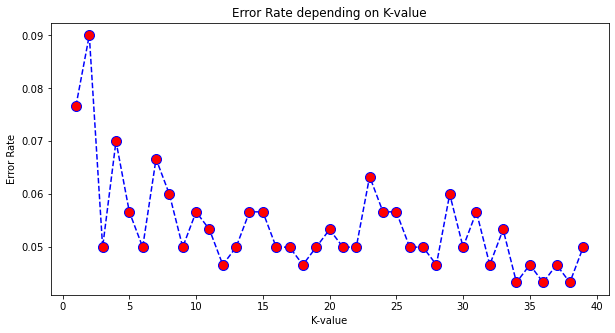

In [38]:
#Plot out the error rates
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate depending on K-value')
plt.xlabel('K-value')
plt.ylabel('Error Rate')